<a href="https://colab.research.google.com/github/Oluwajuwon-O/DSN-AI-Bootcamp-Qualification-Hackathon-by-Olamilekan-Omotosho/blob/main/Census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import tensorflow as tf


%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
from google.colab import files
census = files.upload()

Saving CensusDB.csv to CensusDB.csv


In [ ]:
census = pd.read_csv('CensusDB.csv')
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


In [ ]:
df = census.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [ ]:
df.shape

(32561, 14)

In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
cols = [col for col in df.columns if '?' in df[col].to_list()]
cols

['workclass', 'occupation', 'native-country']

In [ ]:
# check if the number of ? is equal for affected columns
for i in range(len(cols)):
    print(df[cols[i-1]].value_counts()['?'] == df[cols[i]].value_counts()['?'])

# using list comprehension
[df[cols[i-1]].value_counts()['?'] == df[cols[i]].value_counts()['?'] for i in range(len(cols))]

False
False
False


[False, False, False]

In [ ]:
# check number & proportion of ? in affected columns
for i in cols:
    print(i, '\t', df[i].value_counts()['?'], '\t', str('{0:.2f}'.format((df[i].value_counts()['?']/df.shape[0])*100))+'%')

workclass 	 1836 	 5.64%
occupation 	 1843 	 5.66%
native-country 	 583 	 1.79%


In [ ]:
a =[1,2,3]
a.extend([4])
a

[1, 2, 3, 4]

In [ ]:
# get index of affected columns
indices = []
for i in cols:
    indices.extend(df[df[i] == '?'].index)

indices = list(set(indices))
len(indices)

2399

In [ ]:
df1 = df.drop(index=indices).reset_index(drop=True)
df1.shape[0]/df.shape[0]

0.9263229016307853

In [ ]:
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,Male,0,3770,40,United-States,<=50K


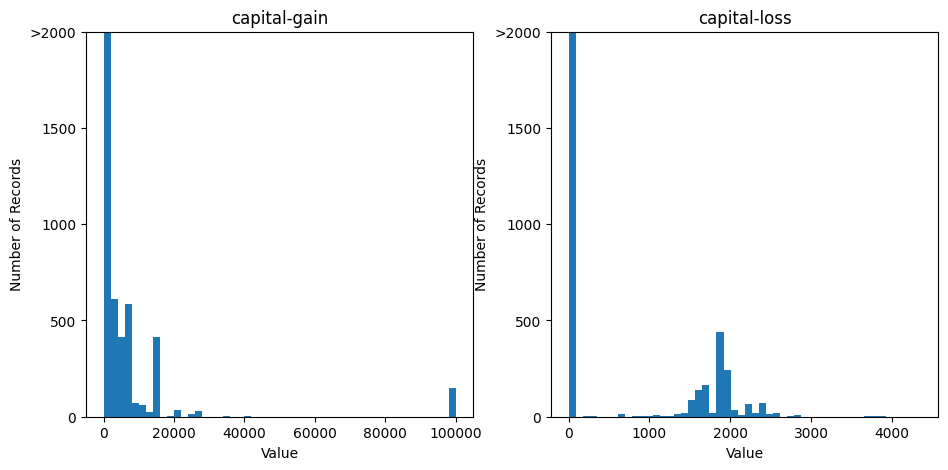

In [ ]:
fig = plt.figure(figsize = (11,5))

for i, feature in enumerate(['capital-gain','capital-loss']):
    ax = fig.add_subplot(1, 2, i+1)
    ax.hist(df1[feature], bins = 50)
    ax.set_title(f"{feature}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Number of Records")
    ax.set_ylim((0, 2000))
    ax.set_yticks([0, 500, 1000, 1500, 2000])
    ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

In [ ]:
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'sex', 'native-country']
numerical= ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
capitals = ['capital-gain','capital-loss']

In [ ]:
X = df1.drop(['income'],axis= 1)
y = df1['income']

In [ ]:
# encode target
y = y.map({'<=50K': 0, '>50K': 1})

In [ ]:
def get_categorical_cols(X):
    return X[categorical]

def get_numerical_cols(X):
    return X[numerical]

def get_capital_cols(X):
    return X[capitals]

def log_transform_captitals(X):
    return X.apply(lambda x: np.log(x+1))

def get_dummies(X):
    return pd.get_dummies(X)

In [ ]:
capitals_pipeline = Pipeline([
    ('get_capitals', FunctionTransformer(get_capital_cols)),
    ('log_transformation',FunctionTransformer(log_transform_captitals))
])

numerical_pipeline = Pipeline([
    ('get_numericals', FunctionTransformer(get_numerical_cols)),
    ('min_max_scaling', MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ('get_categoricals', FunctionTransformer(get_categorical_cols)),
    ('encoding (get_dummies)', FunctionTransformer(get_dummies))
])

In [ ]:
steps_ = FeatureUnion([
    ('capital_pipeline', capitals_pipeline),
    ('numerical_pipeline', numerical_pipeline),
    ('categorical_pipeline', categorical_pipeline)
])

full_pipeline = Pipeline([('steps_', steps_)])

X = full_pipeline.fit_transform(df1)

In [ ]:
# train_test_split
seed = 42
x_train,x_test,y_train,y_test = train_test_split(X,y, stratify=y, test_size= 0.2, random_state=seed)

In [ ]:
clf_1 = XGBClassifier(random_state= seed)
clf_2 = RandomForestClassifier(random_state= seed)
clf_3 = AdaBoostClassifier(random_state= seed)

In [ ]:
clfs = [clf_1, clf_2, clf_3]
classifier_names = [clf.__class__.__name__ for clf in clfs]


# Fitting the model and obtaining metrics
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []

for clf in clfs:
    clf.fit(x_train, y_train)
    train_pred = clf.predict(x_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)
    train_f1_score = f1_score(y_train, train_pred)
    train_f1_scores.append(train_f1_score)
    test_pred = clf.predict(x_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)
    test_f1_score = f1_score(y_test, test_pred)
    test_f1_scores.append(test_f1_score)

In [ ]:
train_accuracies, train_f1_scores, test_accuracies, test_f1_scores

([0.8996643043640433, 1.0, 0.8551121057648473],
 [0.7840128468195201, 1.0, 0.6741845293569432],
 [0.8741919443063153, 0.8596055030664678, 0.8627548483341622],
 [0.7252985884907709, 0.6936708860759494, 0.691734921816828])

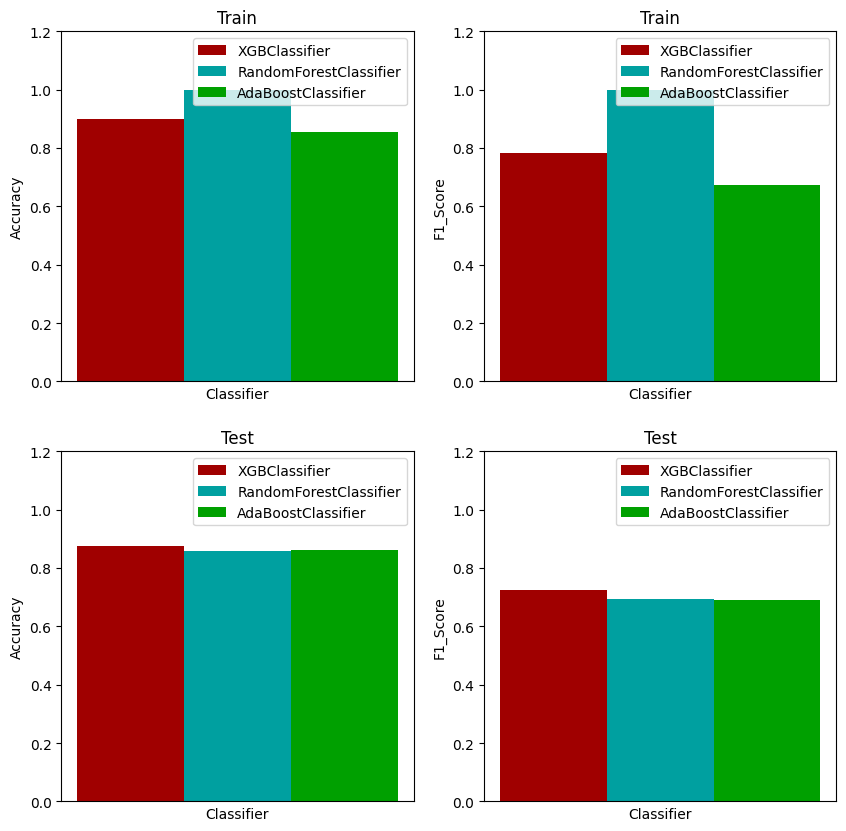

In [ ]:
# Plotting the accuracies
bar_width = 0.3
colors = ['#A00000', '#00A0A0', '#00A000']

# fig, ax = plt.subplots(2, 2, figsize=[8,11])
# for i, j in enumerate(train_accuracies):
#     ax[0, 0].bar(1 + i * bar_width, j, width=bar_width, color=colors[i])

plt.figure(figsize=[10,10])
plt.subplot(2,2,1)

for i, j in enumerate(train_accuracies):
    plt.bar(1 + i * bar_width, j, width=bar_width, color=colors[i], label=classifier_names[i])
    plt.ylim(0,1.2)
    plt.xticks([])
    plt.xlabel('Classifier')
    plt.ylabel('Accuracy')
    plt.title('Train')
    plt.legend()
plt.subplot(2,2,2)
for i, j in enumerate(train_f1_scores):
    plt.bar(1 + i * bar_width, j, width=bar_width, color=colors[i], label=classifier_names[i])
    plt.ylim(0,1.2)
    plt.xticks([])
    plt.xlabel('Classifier')
    plt.ylabel('F1_Score')
    plt.title('Train')
    plt.legend()
plt.subplot(2,2,3)
for i, j in enumerate(test_accuracies):
    plt.bar(1 + i * bar_width, j, width=bar_width, color=colors[i], label=classifier_names[i])
    plt.legend()
    plt.ylim(0,1.2)
    plt.xticks([])
    plt.xlabel('Classifier')
    plt.ylabel('Accuracy')
    plt.title('Test')
plt.subplot(2,2,4)
for i, j in enumerate(test_f1_scores):
    plt.bar(1 + i * bar_width, j, width=bar_width, color=colors[i], label=classifier_names[i])
    plt.ylim(0,1.2)
    plt.xticks([])
    plt.xlabel('Classifier')
    plt.ylabel('F1_Score')
    plt.title('Test')
    plt.legend()

In [ ]:
# fig, ax = plt.subplots(2,2, figsize=[5,5])
# for i,j in enumerate(train_accuracies):
#     ax[0,0].bar(1 + i * bar_width, j, width=bar_width, color=colors[i], label=classifier_names[i])
# for i,j in enumerate(train_f1_scores):
#     ax[0,1].bar(1 + i * bar_width, j, width=bar_width, color=colors[i], label=classifier_names[i])
# for i,j in enumerate(test_accuracies):
#     ax[1,0].bar(1 + i * bar_width, j, width=bar_width, color=colors[i], label=classifier_names[i])
# for i,j in enumerate(test_f1_scores):
#     ax[1,1].bar(1 + i * bar_width, j, width=bar_width, color=colors[i], label=classifier_names[i])

In [ ]:
gender_col = tf.feature_column.categorical_column_with_vocabulary_list('sex', ['Male', 'Female'])

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [ ]:
other_categorical = [col for col in categorical if col != 'sex']
other_categorical = [tf.feature_column.categorical_column_with_hash_bucket(col, hash_bucket_size=1000) for col in other_categorical]
other_categorical

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[HashedCategoricalColumn(key='workclass', hash_bucket_size=1000, dtype=tf.string),
 HashedCategoricalColumn(key='education', hash_bucket_size=1000, dtype=tf.string),
 HashedCategoricalColumn(key='marital-status', hash_bucket_size=1000, dtype=tf.string),
 HashedCategoricalColumn(key='occupation', hash_bucket_size=1000, dtype=tf.string),
 HashedCategoricalColumn(key='relationship', hash_bucket_size=1000, dtype=tf.string),
 HashedCategoricalColumn(key='native-country', hash_bucket_size=1000, dtype=tf.string)]

In [ ]:
feature_col_categorical = [gender_col] + other_categorical
feature_col_categorical

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('Male', 'Female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 HashedCategoricalColumn(key='workclass', hash_bucket_size=1000, dtype=tf.string),
 HashedCategoricalColumn(key='education', hash_bucket_size=1000, dtype=tf.string),
 HashedCategoricalColumn(key='marital-status', hash_bucket_size=1000, dtype=tf.string),
 HashedCategoricalColumn(key='occupation', hash_bucket_size=1000, dtype=tf.string),
 HashedCategoricalColumn(key='relationship', hash_bucket_size=1000, dtype=tf.string),
 HashedCategoricalColumn(key='native-country', hash_bucket_size=1000, dtype=tf.string)]

In [ ]:
feature_col_categorical_embed = [tf.feature_column.embedding_column(col, len(df1[col[0]].unique())) for col in feature_col_categorical]

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [ ]:
feature_col_numeric = [tf.feature_column.numeric_column(col) for col in numerical]
feature_col_numeric

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='fnlwgt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='education-num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='capital-gain', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='capital-loss', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='hours-per-week', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [ ]:
feature_col = feature_col_categorical_embed + feature_col_numeric
feature_col

[EmbeddingColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('Male', 'Female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), dimension=2, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x7843792131f0>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True, use_safe_embedding_lookup=True),
 EmbeddingColumn(categorical_column=HashedCategoricalColumn(key='workclass', hash_bucket_size=1000, dtype=tf.string), dimension=7, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x784379213070>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True, use_safe_embedding_lookup=True),
 EmbeddingColumn(categorical_column=HashedCategoricalColumn(key='education', hash_bucket_size=1000, dtype=tf.string), dimension=16, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x784379213310>, ckpt_to_load_f

In [ ]:
df1['income'] = df1['income'].map({'<=50K': 0, '>50K': 1})

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('income')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
        ds = ds.batch(batch_size)
    return ds

In [ ]:
train, test = train_test_split(df1, test_size=0.2, random_state=seed)

In [ ]:
train = df_to_dataset(train)
test = df_to_dataset(test)

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
input_layer = tf.keras.layers.DenseFeatures(feature_col)
model =  tf.keras.Sequential([
    input_layer,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train, epochs=30)

Epoch 1/30
755/755 [==============================] - 7s 4ms/step - loss: 242.0906 - accuracy: 0.6779
Epoch 2/30
755/755 [==============================] - 4s 5ms/step - loss: 135.8931 - accuracy: 0.6898
Epoch 3/30
755/755 [==============================] - 4s 5ms/step - loss: 93.1508 - accuracy: 0.7142
Epoch 4/30
755/755 [==============================] - 3s 4ms/step - loss: 69.4288 - accuracy: 0.7351
Epoch 5/30
755/755 [==============================] - 3s 4ms/step - loss: 44.0512 - accuracy: 0.7605
Epoch 6/30
755/755 [==============================] - 5s 6ms/step - loss: 43.9885 - accuracy: 0.7512
Epoch 7/30
755/755 [==============================] - 3s 4ms/step - loss: 39.6245 - accuracy: 0.7599
Epoch 8/30
755/755 [==============================] - 3s 4ms/step - loss: 28.4512 - accuracy: 0.7736
Epoch 9/30
755/755 [==============================] - 4s 5ms/step - loss: 31.3819 - accuracy: 0.7697
Epoch 10/30
755/755 [==============================] - 3s 4ms/step - loss: 29.1032 - accu

In [ ]:
loss, accuracy = model.evaluate(test)
print("Loss: ", loss,'\n', "Accuracy: ", accuracy)

189/189 [==============================] - 0s 2ms/step - loss: 15.7166 - accuracy: 0.3139
Loss:  15.716633796691895 
 Accuracy:  0.31393998861312866


In [ ]:
y_pred_probs = model.predict(test)
y_pred_probs = y_pred_probs.flatten()
y_pred_probs

189/189 [==============================] - 1s 2ms/step


array([0.9999992, 1.       , 1.       , ..., 1.       , 1.       ,
       1.       ], dtype=float32)

In [ ]:
y_pred = np.where(y_pred_probs > 0.5, 1, 0)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_true = []
for feature,label in test:
    y_true.extend(label.numpy())
y_true

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,


In [ ]:
print(classification_report(y_true, y_pred, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.72      0.07      0.12      4533
        >50K       0.25      0.92      0.39      1500

    accuracy                           0.28      6033
   macro avg       0.48      0.49      0.25      6033
weighted avg       0.60      0.28      0.19      6033

